In [124]:
from torch.utils import data
import torchvision
import numpy as np
from PIL import Image
import pandas as pd
import os
import torchvision.transforms as transforms



In [125]:
data_csv = pd.read_csv("petfinder-pawpularity-score/train.csv")
data_csv.head()


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [126]:
class PetDataset(data.Dataset):
    def __init__(self, data_transform=None):
        self.transform = data_transform
        self.file_path = os.getcwd()
        data_csv = pd.read_csv("petfinder-pawpularity-score/train.csv")
        self.label_df = data_csv


    def __getitem__(self, index):
        label = self.label_df.iloc[index, 2]
        img_id = self.label_df.iloc[index, 0]
        img_path = "petfinder-pawpularity-score/train/" + img_id + ".jpg"
        img = np.array(Image.open(img_path))
        if self.transform is not None:
            img = self.transform(img)
        return img, label

    def __len__(self):
        return self.label_df.shape[0]


In [127]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((32,32)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = PetDataset(data_transform=transform)
dataloader = data.DataLoader(dataset, batch_size=4)

dataiter = iter(dataloader)
images, labels = dataiter.next()

images.size()


torch.Size([4, 3, 32, 32])

In [128]:
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

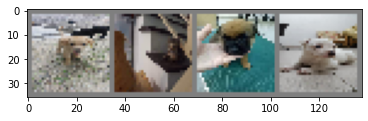

tensor([1, 1, 1, 1])


In [129]:
imshow(torchvision.utils.make_grid(images))
